In [3]:
from pyexpat import model


del model

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [14]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [18]:
# 전체 학습 데이터에서 5000개의 검증데이터를 분리, 부동소수점 데이터의 0~1 로 정규화

x_val, x_train1 = x_train[:5000] / 255. , x_train[5000:] / 255.
y_val, y_train1 = y_train[:5000], y_train[5000:]

x_test = x_test / 255.

In [19]:
x_val.shape, x_train1.shape, y_val.shape, y_train1.shape

((5000, 28, 28), (55000, 28, 28), (5000,), (55000,))

Text(0.5, 1.0, '2')

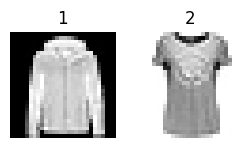

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(3, 3))
axes[0].imshow(x_train1[0], cmap='gray')
axes[0].axis('off')
axes[0].set_title('1')

axes[1].imshow(x_train1[1], cmap='binary')
axes[1].axis('off')
axes[1].set_title('2')

In [52]:
# 보스턴 집값 예측 - 회귀

In [56]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing(as_frame = True)
print(housing)
type(housing)

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -1

sklearn.utils._bunch.Bunch

In [60]:
target = housing['target']
target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(housing.data, target, test_size=0.2, random_state=42)

In [62]:
X_train2, X_val, Y_train2, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)